In [2]:
import pandas as pd
import numpy as np
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [8]:
train.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

## EDA

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
id             39774 non-null int64
cuisine        39774 non-null object
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [205]:
train.cuisine.value_counts().values

array([7838, 6438, 4320, 3003, 2673, 2646, 1546, 1539, 1423, 1175,  989,
        830,  825,  821,  804,  755,  667,  526,  489,  467], dtype=int64)

### Cuisine Distribution

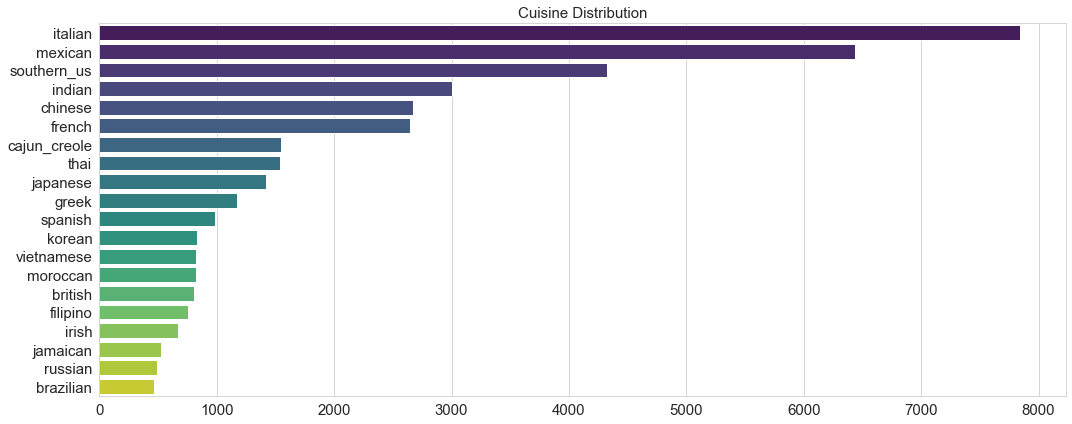

In [225]:
ax1, fig1 = plt.subplots(figsize=(15,6))
#train.cuisine.value_counts().plot(kind='bar');
sns.barplot(y=train.cuisine.value_counts().index, x=train.cuisine.value_counts().values, palette='viridis', ax=fig1)
plt.title('Cuisine Distribution', size=15);
plt.tick_params(labelsize=15)
plt.tight_layout()


### Average number of ingredients per Cuisine 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

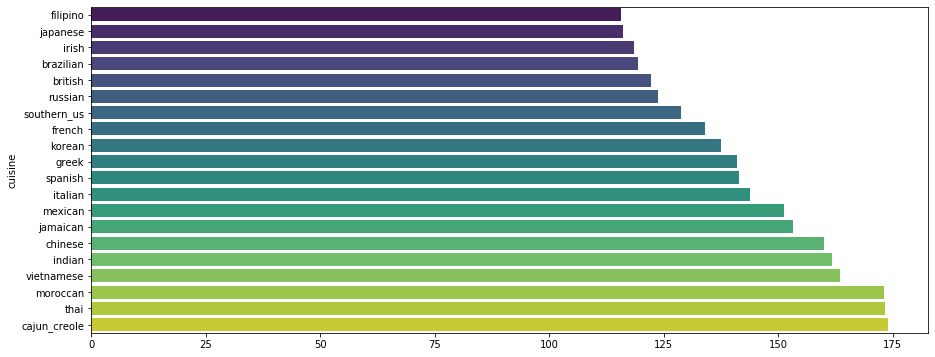

In [318]:
train['Items'] = train.ingredients.apply(lambda x: len(x))
aa = train.groupby('cuisine')['Items'].agg(np.average).sort_values(ascending=True)#.plot(kind='bar')

ax , fig = plt.subplots(figsize=(15,6))
sns.barplot(y=aa.index,x= aa.values, palette='viridis')
plt.tight_layout()

### Common Ingredients

In [210]:
#from collections import Counter
#Counter([ingredient for ingredient_list in train.ingredients for ingredient in ingredient_list])

token = [ingredient for ingredient_list in train.ingredients for ingredient in ingredient_list]

#same as iterating over each row and then each item in the list within the row

# items=[]
# for line in train.ingredients:
#     for item in line:
#         items.append(item)


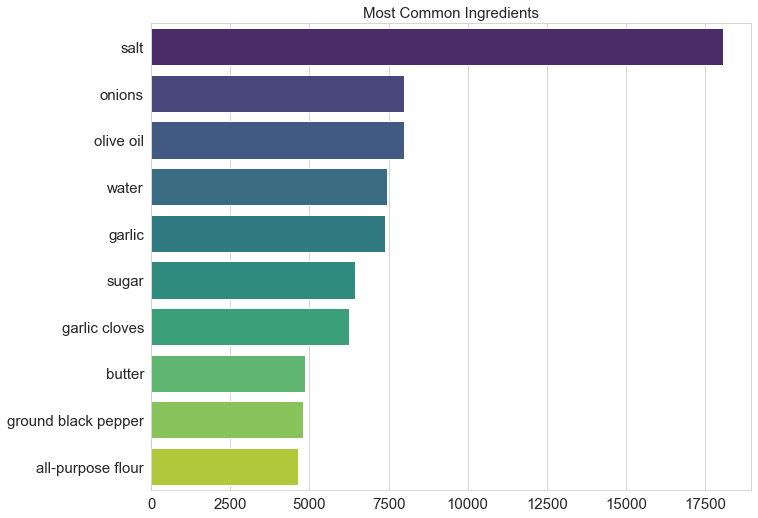

In [185]:
freq = nltk.FreqDist(token)

Ingrd = sorted(freq.items(), key= lambda kv: kv[1], reverse=True)

x,y= zip(*Ingrd)
# plt.bar(x= x[:10], height= y[:10])

ax, fig = plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')

sns.barplot(y =list(x[:10]),x= list(y[:10]), palette='viridis')
plt.tight_layout()
plt.title('Most Common Ingredients', size=15)
plt.tick_params(labelsize=15)


In [194]:
x[-10:]

('Oscar Mayer Cotto Salami',
 'Challenge Butter',
 'orange glaze',
 'cholesterol free egg substitute',
 'ciabatta loaf',
 'LiptonÂ® Iced Tea Brew Family Size Tea Bags',
 'Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix',
 'lop chong',
 'tomato garlic pasta sauce',
 'crushed cheese crackers')

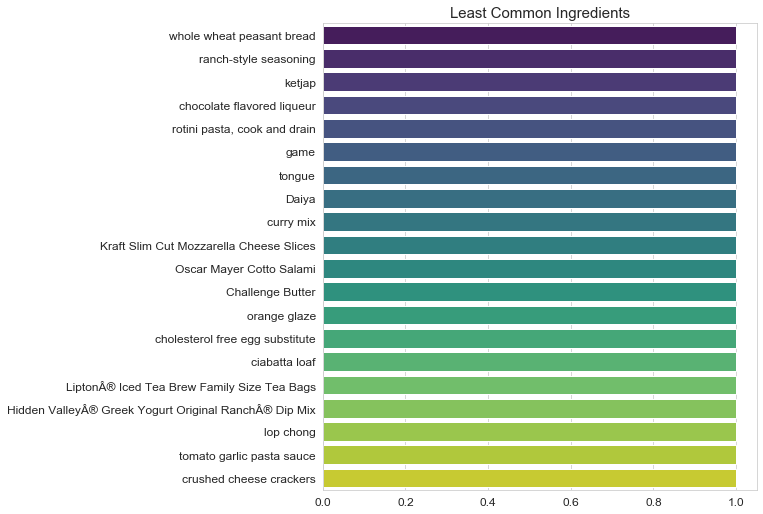

In [199]:
ax, fig = plt.subplots(figsize=(10,7))

sns.barplot(y =list(x[-20:]),x= list(y[-20:]), palette='viridis')
plt.tight_layout()
plt.title('Least Common Ingredients', size=15)
plt.tick_params(labelsize=12)

## Preprocessing

In [4]:
# convert to strings from list enteries. 
train.ingredients = train.ingredients.apply(lambda x: ', '.join(x))
test.ingredients = test.ingredients.apply(lambda x: ', '.join(x))


In [144]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# train['encoded_labels'] =le.fit_transform(train['cuisine'])

In [6]:
# find non alpha numeric characters in the dataframe. 
train[train['ingredients'].str.count(r'\W,')>0]['ingredients']

984      frozen mixed thawed vegetables,, ragu old worl...
1138     garam masala, ginger, chaat masala, chili powd...
5146     water, peeled fresh ginger, peanut oil, hot re...
6802     soy sauce, shallots, rice vinegar, frozen mixe...
6873     sugar, unsalted butter, flour tortillas (not l...
7944     vegetable oil, flour tortillas (not low fat), ...
8460     chiles, chana dal, black mustard seeds, asafet...
10387    crushed tomatoes, egg whites, provolone cheese...
11039    olive oil, boneless skinless chicken breast ha...
15788    cream of chicken soup, poultry seasoning, bisc...
17313    boneless moulard duck breast halves, habanero ...
19897    chiles, pÃ¢tÃ©, cucumber, daikon, cooked meat,...
22936    tomatoes, fresh ginger, chili powder, cumin se...
26867    tumeric, cilantro sprigs, dal, green chile, pe...
28124    eggs, grated parmesan cheese, finely chopped f...
28150    red chili powder, garam masala, russet potatoe...
28655    andouille sausage, ground black pepper, extra-.

In [5]:
test[test['ingredients'].str.count(r'\W,')>0]['ingredients']

555     tomatoes, tumeric, ginger, white lentils, red ...
1667    KnorrÂ® Chicken Flavor Rice Sidesâ„¢, shredded...
4116    bread, minced garlic, garam masala, salt, chop...
4379    reduced sodium chicken broth, medium shrimp, l...
4382    bay leaves, cumin seed, red chili peppers, Ben...
5767    long beans, cherry tomatoes, ground coriander,...
Name: ingredients, dtype: object

In [7]:
#remove non-standard alpha numeric characters, this doesn't include the latin characters
train['ingredients']=train['ingredients'].apply(lambda x: re.sub(r'[^\w\s\,]+','',x)) 
test['ingredients']=test['ingredients'].apply(lambda x: re.sub(r'[^\w\s\,]+','',x)) 


In [8]:
# Dataframe still has non standard characters like Ã , we will leave them as is. 
train[train['ingredients'].str.contains(r'[^a-zA-Z0-9_, ]+')]

,id,cuisine,ingredients
68,43769,french,"orange juice concentrate, pumpkin purÃe, marsh..."
94,25164,mexican,"ground cinnamon, whole milk, golden brown suga..."
120,20955,italian,"cold water, sugar, butter, chocolate morsels, ..."
151,17821,italian,"sugar, mascarpone, bittersweet chocolate, fat ..."
171,40064,french,"pepper, grated GruyÃre cheese, heavy cream, sa..."
...,...,...,...
39597,19556,southern_us,"firmly packed brown sugar, salt, bread, granul..."
39613,37510,southern_us,"diced onions, green bell pepper, dried thyme, ..."
39622,703,southern_us,"cholesterol free egg substitute, sugar, whole ..."
39682,36135,southern_us,"water, LiptonÂ Iced Tea Brew Family Size Tea B..."


In [9]:
test[test['ingredients'].str.contains(r'[^a-zA-Z0-9_, ]+')]

,id,ingredients
87,9126,"shallots, plum tomatoes, garlic, fresh thyme l..."
89,28194,"dark soy sauce, pineapple, chili powder, cilan..."
107,28464,"fresh basil, kosher salt, ground black pepper,..."
114,16675,"basil dried leaves, Pillsburyâ Refrigerated Cr..."
243,24967,"fish sauce, red curry paste, lime juice, cocon..."
...,...,...
9209,32970,"brown sugar, granulated sugar, crÃme fraÃche, ..."
9241,22994,"vanilla beans, granulated sugar, blanched almo..."
9253,28947,"baguette, beef stock, unsalted butter, onions,..."
9524,6588,"olive oil, chÃvre, fontina cheese, roasted red..."


#### Stop words

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

train['ingredients'].apply(lambda x: [w for w in str(x).split(',') if w not in stop_words])
test['ingredients'].apply(lambda x: [w for w in str(x).split(',') if w not in stop_words])


for row in train['ingredients'].apply(lambda x: x.split(',')):
    for word in row:
        if word in stop_words:
            print(word)

#### Lemmatization

In [12]:
wLemma = nltk.WordNetLemmatizer()
train['ingredients']=train['ingredients'].apply(lambda t: wLemma.lemmatize(t))
test['ingredients']=test['ingredients'].apply(lambda t: wLemma.lemmatize(t))


### Vectorization

In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train['ingredients'], 
                                                    train['cuisine'], 
                                                    random_state=42
                                                   )

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
X_train

5514     quinoa, purple onion, pepper, jalapeno chilies...
1406     minced garlic, ginger, canola oil, sugar, napa...
33711    milk, bacon, whole wheat breadcrumbs, eggs, ba...
3637     white onion, button mushrooms, boneless skinle...
19704    water, tamarind concentrate, salt, cayenne pep...
                               ...                        
6265     tomato purÃe, butter, salt, taco seasoning, pa...
11284    marsala wine, butter, olive oil, fresh mushroo...
38158    blue crabs, peeled fresh ginger, soy sauce, sa...
860      pepper, spicy brown mustard, boneless chicken ...
15795    olive oil, thyme leaves, dried lavender, lemon...
Name: ingredients, Length: 29830, dtype: object

In [67]:
vect = CountVectorizer(stop_words=stop_words).fit(X_train)
vect.get_feature_names()

['00',
 '10',
 '100',
 '12',
 '14',
 '145',
 '15',
 '25',
 '33',
 '40',
 '43',
 '95',
 '96',
 'abalone',
 'abbamele',
 'absinthe',
 'abura',
 'acai',
 'accent',
 'accompaniment',
 'achiote',
 'acid',
 'acini',
 'ackee',
 'acorn',
 'active',
 'added',
 'adobo',
 'adzuki',
 'agar',
 'agave',
 'age',
 'aged',
 'ahi',
 'aioli',
 'ajinomoto',
 'ajwain',
 'aka',
 'alaskan',
 'albacore',
 'alcohol',
 'ale',
 'aleppo',
 'alfalfa',
 'alfredo',
 'allpurpose',
 'allspice',
 'almond',
 'almonds',
 'aloe',
 'alphabet',
 'alum',
 'amarena',
 'amaretti',
 'amaretto',
 'amba',
 'amber',
 'amberjack',
 'amchur',
 'america',
 'american',
 'aminos',
 'amontillado',
 'ampalaya',
 'anaheim',
 'anasazi',
 'ancho',
 'anchovies',
 'anchovy',
 'andouille',
 'anejo',
 'angel',
 'anglaise',
 'angled',
 'angostura',
 'angus',
 'anise',
 'anisette',
 'anjou',
 'annatto',
 'aonori',
 'apple',
 'apples',
 'applesauce',
 'applewood',
 'apricot',
 'apricots',
 'aquavit',
 'arak',
 'arame',
 'arbol',
 'arborio',
 'arct

In [68]:
len(vect.vocabulary_)

2912

In [ ]:
X_train_vectorized = vect.transform(X_train)
test_vectorized = vect.transform(test['ingredients'])

### Building Model

In [70]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = model.predict(vect.transform(X_test))

In [73]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7818785197103781


#### Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc.fit(X_train_vectorized, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(vect.transform(X_test))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [83]:
from sklearn.metrics import classification_report
print(grid_clf_acc.best_params_)
print(classification_report(y_test, y_pred_acc))

{'C': 5, 'penalty': 'l2'}
              precision    recall  f1-score   support

   brazilian       0.79      0.58      0.67       119
     british       0.68      0.46      0.55       207
cajun_creole       0.79      0.65      0.71       419
     chinese       0.77      0.85      0.81       625
    filipino       0.69      0.54      0.60       163
      french       0.62      0.65      0.63       670
       greek       0.74      0.71      0.73       301
      indian       0.87      0.90      0.88       751
       irish       0.61      0.44      0.51       180
     italian       0.80      0.90      0.85      1950
    jamaican       0.87      0.70      0.78       117
    japanese       0.81      0.71      0.76       360
      korean       0.84      0.77      0.80       204
     mexican       0.91      0.93      0.92      1668
    moroccan       0.88      0.73      0.80       195
     russian       0.57      0.46      0.51       113
 southern_us       0.70      0.78      0.74      1062
 

### Linear SVC 

In [45]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

param_grid = {'C':[0.01, 0.1, 0.5,1,10,100]}
grid_clf = GridSearchCV(clf, cv=5, param_grid = param_grid , refit=True, verbose =2)

grid_clf.fit(X_train_vectorized, y_train)

#Predict values based on new parameters
svcy_pred = grid_clf.predict(vect.transform(X_test))

#clf.fit(X_train_vectorized,y_train)
#sv_pred = clf.predict(vect.transform(X_test))
print('Accuracy: ', accuracy_score(y_test, svcy_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   3.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   3.0s
[CV] C=0.1 ...........................................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................................. C=1, total=   8.6s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   8.6s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   9.4s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   7.3s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=  12.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=  14.3s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=  11.9s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.7min finished


Accuracy:  0.7811745776347546


In [46]:
print('Best Parameters:',grid_clf.best_params_)
print(classification_report(y_test, svcy_pred))

Best Parameters: {'C': 0.01}
              precision    recall  f1-score   support

   brazilian       0.75      0.59      0.66       119
     british       0.72      0.35      0.47       207
cajun_creole       0.82      0.66      0.73       419
     chinese       0.77      0.87      0.82       625
    filipino       0.72      0.54      0.62       163
      french       0.61      0.61      0.61       670
       greek       0.77      0.68      0.72       301
      indian       0.86      0.89      0.88       751
       irish       0.66      0.38      0.49       180
     italian       0.77      0.91      0.84      1950
    jamaican       0.84      0.65      0.73       117
    japanese       0.87      0.70      0.77       360
      korean       0.84      0.75      0.79       204
     mexican       0.90      0.93      0.91      1668
    moroccan       0.85      0.74      0.79       195
     russian       0.71      0.42      0.53       113
 southern_us       0.67      0.80      0.73      106

In [47]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index  = model.coef_.argsort()

In [48]:
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
[['curry' 'basil' 'fish sauce' ... 'manioc flour' 'manioc' 'cachaca']
 ['peaches' 'chicken' 'buttermilk' ... 'haddock' 'stilton cheese'
  'stilton']
 ['pepper cajun' 'tortillas' 'celery black' ... 'cajun seasoning' 'cajun'
  'creole']
 ...
 ['powder cumin' 'thai' 'lemongrass' ... 'curry' 'yoghurt' 'curds']
 ['rice' 'cornmeal' 'sweet potatoes' ... 'stout' 'potatoes' 'irish']
 ['grits' 'crawfish' 'tortillas' ... 'mascarpone' 'spaghetti' 'polenta']]

Largest Coefs: 
[['cheese' 'tamarind' 'cream' ... 'vietnamese' 'tapioca' 'fish sauce']
 ['vietnamese' 'garlic chili' 'cheese' ... 'peanut' 'thai'
  'peanut butter']
 ['lamb' 'mustard' 'water large' ... 'manchego' 'manchego cheese'
  'chorizo']
 ...
 ['tomatoes' 'lime' 'butter' ... 'gochujang' 'gochujang base' 'kimchi']
 ['kimchi' 'buttermilk' 'pepper flakes' ... 'mirin' 'miso' 'sake']
 ['cream' 'buttermilk' 'fish sauce' ... 'thyme' 'allspice' 'jerk']]


#### XGBoost Classifier

In [49]:
from xgboost import XGBClassifier

clf = XGBClassifier()

clf.fit(X_train_vectorized, y_train)

xgb_pred = clf.predict(vect.transform(X_test))

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

   brazilian       0.79      0.55      0.65       119
     british       0.76      0.25      0.38       207
cajun_creole       0.80      0.67      0.73       419
     chinese       0.74      0.83      0.78       625
    filipino       0.78      0.45      0.57       163
      french       0.57      0.48      0.52       670
       greek       0.73      0.64      0.69       301
      indian       0.87      0.85      0.86       751
       irish       0.71      0.35      0.47       180
     italian       0.68      0.89      0.77      1950
    jamaican       0.87      0.56      0.68       117
    japanese       0.88      0.64      0.74       360
      korean       0.84      0.62      0.72       204
     mexican       0.88      0.88      0.88      1668
    moroccan       0.86      0.71      0.78       195
     russian       0.76      0.39      0.51       113
 southern_us       0.56      0.74      0.64      1062
     spanish       0.68    

### TFIDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

1756

In [85]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression(C=5, penalty='l2')
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   brazilian       0.79      0.58      0.67       119
     british       0.68      0.46      0.55       207
cajun_creole       0.79      0.65      0.71       419
     chinese       0.77      0.85      0.81       625
    filipino       0.69      0.54      0.60       163
      french       0.62      0.65      0.63       670
       greek       0.74      0.71      0.73       301
      indian       0.87      0.90      0.88       751
       irish       0.61      0.44      0.51       180
     italian       0.80      0.90      0.85      1950
    jamaican       0.87      0.70      0.78       117
    japanese       0.81      0.71      0.76       360
      korean       0.84      0.77      0.80       204
     mexican       0.91      0.93      0.92      1668
    moroccan       0.88      0.73      0.80       195
     russian       0.57      0.46      0.51       113
 southern_us       0.70      0.78      0.74      1062
     spanish       0.65    

In [87]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['burgundi' 'vineyard' 'collect' 'premium' 'its' 'butterâ' 'believe'
 'curls' 'biryani' 'shahi']

Largest tfidf: 
['butter' 'pork' 'phyllo' 'prosciutto' 'water' 'udon' 'peanuts' 'grapes'
 'barley' 'espresso']


In [88]:
sorted_coef_index = model.coef_.argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
[['curry' 'basil' 'sauce' ... 'aãai' 'manioc' 'cachaca']
 ['garlic' 'chicken' 'green' ... 'worcestershire' 'haddock' 'stilton']
 ['soy' 'tortillas' 'ginger' ... 'sausage' 'creole' 'cajun']
 ...
 ['fish' 'sauce' 'thai' ... 'yogurt' 'masala' 'curry']
 ['rice' 'oil' 'sweet' ... 'stout' 'potatoes' 'irish']
 ['cajun' 'tortillas' 'grits' ... 'italian' 'polenta' 'arborio']]

Largest Coefs: 
[['cheese' 'cumin' 'tamarind' ... 'tapioca' 'vietnamese' 'fish']
 ['hoisin' 'black' 'cheese' ... 'thai' 'galangal' 'palm']
 ['ginger' 'soy' 'cheese' ... 'sherry' 'chorizo' 'manchego']
 ...
 ['lime' 'tomatoes' 'butter' ... 'sesame' 'gochujang' 'kimchi']
 ['kimchi' 'garlic' 'buttermilk' ... 'mirin' 'sake' 'miso']
 ['oregano' 'cream' 'olive' ... 'allspice' 'thyme' 'jerk']]


In [91]:
train_vectorized = vect.transform(test['ingredients'])


test_predictions = model.predict(train_vectorized)
test_predictions


array(['british', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], dtype=object)

In [116]:
sample.head()

,id,cuisine
0,18009,italian
1,28583,italian
2,41580,italian
3,29752,italian
4,35687,italian


In [117]:
sample['id']= test['id']
sample['cuisine'] = test_predictions
sample.to_csv('submission.csv', index=False)